# **Trabajo final del curso Scoring Crediticio de la Sociedad Ecuatoriana de Estadística**

Autor: Xavier Jácome Piñeiros

[LinkedIn](https://www.linkedin.com/in/xavierjacomep/)

## Análisis Exploratorio de Datos

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

try: 
  import dataprep.eda as dpeda
except:
  !pip install dataprep
  import dataprep.eda as dpeda

pd.options.display.max_columns = 200
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 659.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Capacitaciones/ScoringCrediticio_SEE/

Mounted at /content/drive
/content/drive/My Drive/Capacitaciones/ScoringCrediticio_SEE


Se utilizó el caso de la competencia Kaggle "Home Credit Default Risk". 

Anna Montoya, inversion, KirillOdintsov, Martin Kotek. (2018). Home Credit Default Risk. Kaggle. https://kaggle.com/competitions/home-credit-default-risk

In [ ]:
# Cargar los datos en un dataframe de pandas
path = 'application_train.csv'
df = pd.read_csv(path)

### EDA Manual

In [ ]:
# Ver una descripción general de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
# Ver las primeras filas del conjunto de datos
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0        202500.000  406597.500    24700.500   
1               N             0        270000.000 1293502.500    35698.500   
2               Y             0         67500.000  135000.000     6750.000   
3               Y             0        135000.000  312682.500    29686.500   
4               Y             0        121500.000  513000.000    21865.500   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0       351000.000   Unaccompanied          Working   
1      1129500.000          Family    State servant   
2       135000.000   Unaccompanied          Working   
3       297000.000   Unaccompanied          Working   
4       513000.000   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                       0.019       -9461           -637          -3648.000   
1                       0.004      -16765          -1188          -1186.000   
2                       0.010      -19046           -225          -4260.000   
3                       0.008      -19005          -3039          -9833.000   
4                       0.029      -19932          -3038          -4311.000   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531       26.000           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers            1.000   
1                 1           1           0      Core staff            2.000   
2                 1           1           0        Laborers            1.000   
3                 1           0           0        Laborers            2.000   
4                 1           0           0      Core staff            1.000   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [ ]:
# Ver las últimas filas del conjunto de datos
df.tail()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
307506               N             0        157500.000  254700.000   
307507               Y             0         72000.000  269550.000   
307508               Y             0        153000.000  677664.000   
307509               Y             0        171000.000  370107.000   
307510               N             0        157500.000  675000.000   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
307506    27558.000       225000.000   Unaccompanied               Working   
307507    12001.500       225000.000   Unaccompanied             Pensioner   
307508    29979.000       585000.000   Unaccompanied               Working   
307509    20205.000       319500.000   Unaccompanied  Commercial associate   
307510    49117.500       675000.000   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
307506  Secondary / secondary special          Separated       With parents   
307507  Secondary / secondary special              Widow  House / apartment   
307508               Higher education          Separated  House / apartment   
307509  Secondary / secondary special            Married  House / apartment   
307510               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
307506                       0.033       -9327           -236   
307507                       0.025      -20775         365243   
307508                       0.005      -14966          -7921   
307509                       0.005      -11961          -4786   
307510                       0.046      -16856          -1262   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
307506          -8456.000            -1982          NaN           1   
307507          -4388.000            -4090          NaN           1   
307508          -6737.000            -5150          NaN           1   
307509          -2562.000             -931          NaN           1   
307510          -5128.000             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
307506           0     Sales staff            1.000                     1   
307507           0             NaN            1.000                     2   
307508           1        Managers            1.000                     3   
307509           0        Laborers            2.000                     2   
307510           0        Laborers            2.000                     1   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
307506                            1                   THURSDAY   
307507                            2                     MONDAY   
307508                            3                   THURSDAY   
307509                            2                  WEDNESDAY   
307510                            1                   THURSDAY   

        HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
307506            

In [ ]:
# Ver la estadística descriptiva de las variables numéricas
df.describe()

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count  307511.000 307511.000    307511.000        307511.000  307511.000   
mean   278180.519      0.081         0.417        168797.919  599026.000   
std    102790.175      0.272         0.722        237123.146  402490.777   
min    100002.000      0.000         0.000         25650.000   45000.000   
25%    189145.500      0.000         0.000        112500.000  270000.000   
50%    278202.000      0.000         0.000        147150.000  513531.000   
75%    367142.500      0.000         1.000        202500.000  808650.000   
max    456255.000      1.000        19.000     117000000.000 4050000.000   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count   307499.000       307233.000                  307511.000  307511.000   
mean     27108.574       538396.207                       0.021  -16036.995   
std      14493.737       369446.461                       0.014    4363.989   
min       1615.500        40500.000                       0.000  -25229.000   
25%      16524.000       238500.000                       0.010  -19682.000   
50%      24903.000       450000.000                       0.019  -15750.000   
75%      34596.000       679500.000                       0.029  -12413.000   
max     258025.500      4050000.000                       0.073   -7489.000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
count     307511.000         307511.000       307511.000   104582.000   
mean       63815.046          -4986.120        -2994.202       12.061   
std       141275.767           3522.886         1509.450       11.945   
min       -17912.000         -24672.000        -7197.000        0.000   
25%        -2760.000          -7479.500        -4299.000        5.000   
50%        -1213.000          -4504.000        -3254.000        9.000   
75%         -289.000          -2010.000        -1720.000       15.000   
max       365243.000              0.000            0.000       91.000   

       FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
count  307511.000      307511.000       307511.000        307511.000   
mean        1.000           0.820            0.199             0.998   
std         0.002           0.384            0.400             0.043   
min         0.000           0.000            0.000             0.000   
25%         1.000           1.000            0.000             1.000   
50%         1.000           1.000            0.000             1.000   
75%         1.000           1.000            0.000             1.000   
max         1.000           1.000            1.000             1.000   

       FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000  307511.000       307509.000            307511.000   
mean        0.281       0.057            2.153                 2.052   
std         0.450       0.231            0.911                 0.509   
min         0.000       0.000            1.000                 1.000   
25%         0.000       0.000            2.000                 2.000   
50%         0.000       0.000            2.000                 2.000   
75%         1.000       0.000            3.000                 2.000   
max         1.000       1.000           20.000                 3.000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                   307511.000               307511.000   
mean                         2.032                   12.063   
std                          0.503                    3.266   
min                          1.000                    0.000   
25%                          2.000                   10.000   
50%                          2.000                   12.000   
75%                          2.000                   14.000   
max                          3.000                   23.000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count                

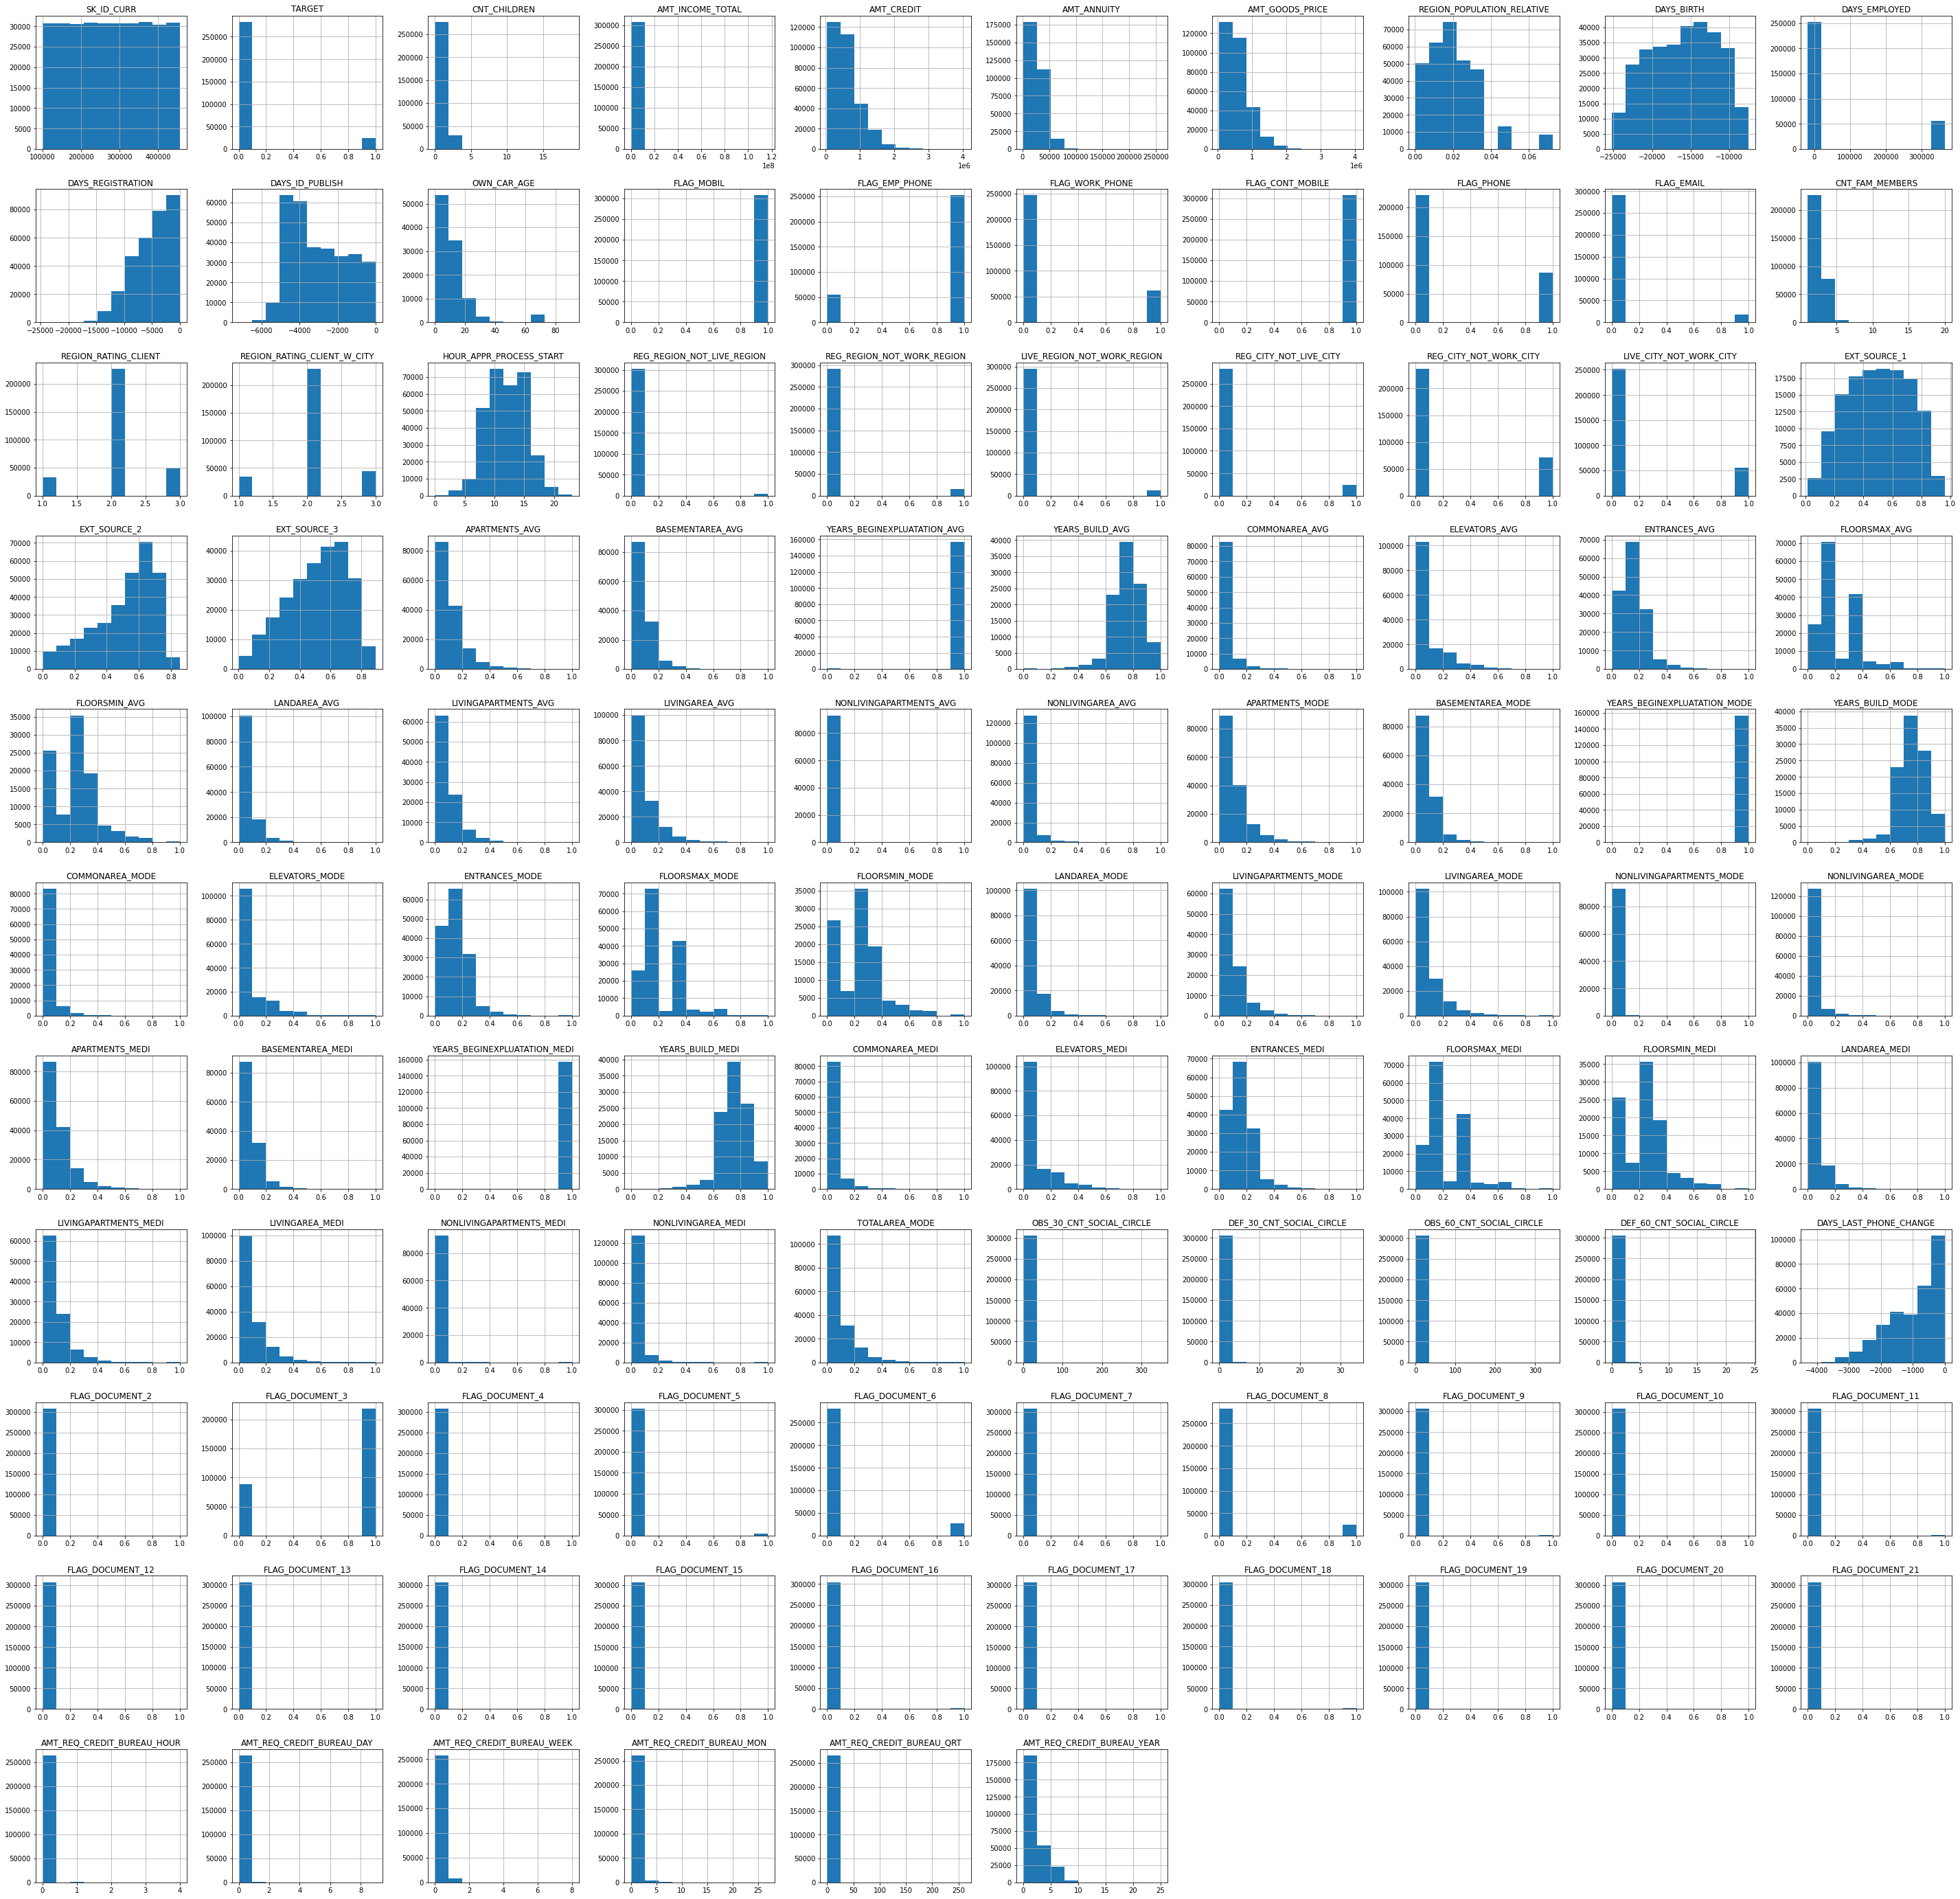

In [ ]:
# Ver la distribución de las variables numéricas
df.hist(figsize=(50,50))
plt.show()

In [ ]:
# Calcular la correlación entre las variables numéricas. 
# Se utilizó método Spearman por posibilidad de variables numéricas que tengan comportamiento categórico
cor = df.corr(method='spearman')

In [ ]:
# Identificar features numéricos relevantes. Se consideran relevantes en función de su correlación con la variable objetivo. 
cor_target = abs(cor["TARGET"])

relevant_features = cor_target[(cor_target>0.10)&(cor_target!=1)]
relevant_features.sort_values(ascending=False)

EXT_SOURCE_3   0.166
EXT_SOURCE_1   0.151
EXT_SOURCE_2   0.147
Name: TARGET, dtype: float64

Se puede observar que solo 3 features tienen una correlación mayor a 0.10. Por tanto, se utilizará para la clasificación las variables con correlación superior a 0.01.

In [ ]:
relevant_features = cor_target[(cor_target>0.01)&(cor_target!=1)]
relevant_features.sort_values(ascending=False)

EXT_SOURCE_3                  0.166
EXT_SOURCE_1                  0.151
EXT_SOURCE_2                  0.147
DAYS_BIRTH                    0.078
REGION_RATING_CLIENT_W_CITY   0.061
                               ... 
NONLIVINGAREA_MEDI            0.013
NONLIVINGAREA_MODE            0.013
FLAG_DOCUMENT_16              0.012
LANDAREA_MODE                 0.012
FLAG_DOCUMENT_13              0.012
Name: TARGET, Length: 70, dtype: float64

70 variables quedan como features numéricos relevantes.

In [ ]:
# Ver la distribución de las variables categóricas
df.describe(include='O')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [ ]:
# Ver la frecuencia de las variables categóricas
df.describe(include='O').T.assign(missing=df.isnull().sum())

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   
FONDKAPREMONT_MODE           97216      4               reg oper account   
HOUSETYPE_MODE              153214      3                 block of flats   
WALLSMATERIAL_MODE          151170      7                          Panel   
EMERGENCYSTATE_MODE         161756      2                             No   

                              freq  missing  
NAME_CONTRACT_TYPE          278232        0  
CODE_GENDER                 202448        0  
FLAG_OWN_CAR                202924        0  
FLAG_OWN_REALTY             213312        0  
NAME_TYPE_SUITE             248526     1292  
NAME_INCOME_TYPE            158774        0  
NAME_EDUCATION_TYPE         218391        0  
NAME_FAMILY_STATUS          196432        0  
NAME_HOUSING_TYPE           272868        0  
OCCUPATION_TYPE              55186    96391  
WEEKDAY_APPR_PROCESS_START   53901        0  
ORGANIZATION_TYPE            67992        0  
FONDKAPREMONT_MODE           73830   210295  
HOUSETYPE_MODE              150503   154297  
WALLSMATERIAL_MODE           66040   156341  
EMERGENCYSTATE_MODE         159428   145755

Existen 4 variables con una cantidad significativa de datos perdidos, sin embargo el uso de optimal binning nos ayudará a utilizarlas para no perder información.

In [ ]:
# Ver el número de observaciones y el número de variables en el conjunto de datos
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 307511
Number of columns: 122


### EDA Automático

In [ ]:
# Variables explicativas
varx = list(set(df.columns).difference(set(['TARGET'])))

ERROR:bokeh.core.validation.check:E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'REG_REGION_NO...ION', 'REG_CITY_NOT_...ITY'



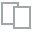
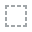
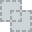
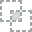
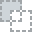
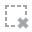
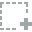
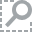
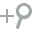
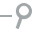
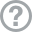
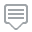
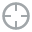
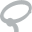
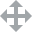
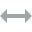
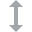
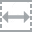
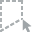
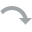
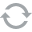
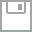
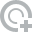
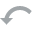
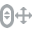
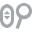
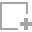
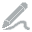
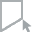
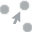
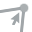
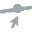

In [ ]:
# Gráfico de datos perdidos
dpeda.plot_missing(df)

Computing repartition-1-1954ff4e146d8231c2037453697c8d8f:  67%|██████▋   | 6/9 [00:00<00:00, 37.51it/s]/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4814: RuntimeWarning: invalid value encountered in sqrt



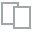
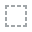
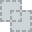
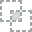
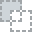
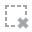
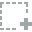
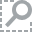
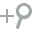
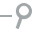
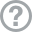
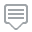
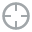
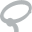
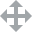
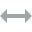
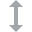
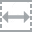
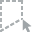
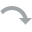
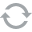
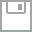
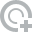
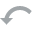
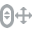
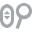
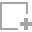
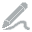
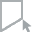
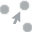
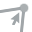
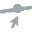

In [ ]:
# Gráfico de correlaciones
dpeda.plot_correlation(df)

In [ ]:
# Reporte completo
report = dpeda.create_report(df)

In [ ]:
report

In [ ]:
report.save('Reporte EDA Caso Credit Scoring SEE') 

Report has been saved to Reporte EDA Caso Credit Scoring SEE.html!
Report has been saved to Reporte EDA Caso Credit Scoring SEE.html!


## Clasificación

In [ ]:
# Importar las librerías necesarias para la clasificación
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report,precision_recall_curve
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn import svm

try:
  import optbinning as opb
except:
  !pip install optbinning

import optbinning as opb
import matplotlib.pyplot as plt

import pickle

In [ ]:
# Separar las columnas de características y la columna objetivo
X = df.drop("TARGET", axis=1)
y = df["TARGET"]

### División del conjunto de datos en entrenamiento y prueba

In [ ]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba de forma estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
# Variables dependientes
var_x = list(set(df.columns).difference(set(['TARGET'])))
print(var_x)

['EMERGENCYSTATE_MODE', 'LIVINGAPARTMENTS_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_BEGINEXPLUATATION_AVG', 'FLAG_DOCUMENT_21', 'REGION_POPULATION_RELATIVE', 'FLAG_DOCUMENT_11', 'LANDAREA_AVG', 'DAYS_LAST_PHONE_CHANGE', 'LIVINGAPARTMENTS_AVG', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_16', 'FLOORSMAX_MODE', 'AMT_CREDIT', 'ENTRANCES_MEDI', 'FLOORSMIN_AVG', 'NAME_INCOME_TYPE', 'FLOORSMIN_MEDI', 'FLAG_WORK_PHONE', 'COMMONAREA_AVG', 'FLAG_MOBIL', 'BASEMENTAREA_AVG', 'FLAG_OWN_CAR', 'HOUSETYPE_MODE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_INCOME_TOTAL', 'BASEMENTAREA_MODE', 'NAME_TYPE_SUITE', 'ELEVATORS_AVG', 'SK_ID_CURR', 'REG_REGION_NOT_WORK_REGION', 'TOTALAREA_MODE', 'FLAG_DOCUMENT_12', 'HOUR_APPR_PROCESS_START', 'ENTRANCES_AVG', 'FLAG_DOCUMENT_20', 'DAYS_REGISTRATION', 'OCCUPATION_TYPE', 'LIVINGAREA_MODE', 'FLAG_EMP_PHONE', 'NONLIVINGAPARTMENTS_MODE', 'AMT_ANNUITY', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'FLAG_EMAIL', 'REGION_RATING_CLIENT

In [ ]:
# Cantidad de variables dependientes a utilizar
len(var_x)

121

In [ ]:
# Criterio de selección en optbinnning
sel_crt = {
    "iv": {"min": 0.05, "max": 1}
}

### Proceso de Binning de variables

In [ ]:
# Realizar binning a las variables categóricas
bp = opb.BinningProcess(var_x, selection_criteria=sel_crt)

### Entrenamieto y validación cruzada de distintos modelos

Se utilizan los algoritmos de Regresión Logística y Perceptrón dado que Scorecard sólo acepta modelos que generen coeficientes de los features.

In [ ]:
# Crear un diccionario para almacenar los modelos y sus puntajes F1
# Se utilizará la métrica F1 porque se espera que el modelo tenga el mejor balance posible entre presición y recall.

models = {"Regresión Logística L2": LogisticRegression(penalty= 'l2',class_weight='balanced',n_jobs=-1),
          "Perceptrón": Perceptron(penalty= 'l2', l1_ratio = 0, class_weight='balanced', n_jobs=-1)
          }
scores = {}

In [ ]:
# Iterar sobre los modelos y evaluarlos con validación cruzada estratificada
# Se utilizan 5 splits

skf = StratifiedKFold(n_splits=5)
for name, model in models.items():
  # Crear un objeto Scorecard con el modelo y el conjunto de entrenamiento
  # La calificación se ecalará a valores entre 300 y 1000 puntos
  scorecard = opb.Scorecard(binning_process=bp, estimator=model
                            ,scaling_method="min_max", scaling_method_params={"min": 300, "max": 1000})
  
  # Realizar validación cruzada estratificada y calcular el puntaje F1 promedio
  f1_scores = cross_val_score(scorecard, X_train, y_train, cv=skf, scoring="f1" ,n_jobs=-1)
  mean_f1 = f1_scores.mean()
  scores[name] = mean_f1

In [ ]:
scores

{'Regresión Logística L2': 0.2513696880172577,
 'Perceptrón': 0.20046189242890167}

### Selección del mejor modelo

In [ ]:
# Seleccionar el modelo con el mejor puntaje F1
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]
best_model

LogisticRegression(class_weight='balanced', n_jobs=-1)

### Entrenamiento del mejor modelo

In [ ]:
# Scorecard
scorecard = opb.Scorecard(binning_process=bp,
                             estimator=best_model, 
                             scaling_method="min_max", scaling_method_params={"min": 300, "max": 1000})

In [ ]:
# Estimación
scorecard_fit = scorecard.fit(X_train, y_train, show_digits=4)

### Búsqueda del mejor punto de corte de la probabilidad de default

In [ ]:
# Calcular las predicciones de probabilidad en el conjunto de prueba
y_probs = scorecard.predict_proba(X_test)[:, 1]

# Crear una lista de puntos de corte a probar
thresholds = np.arange(0.05, 1, 0.05).tolist()

# Inicializar una lista para almacenar los valores del índice F1
f1_scores = []

# Calcular el índice F1 para cada punto de corte
for threshold in thresholds:
  y_pred = (y_probs >= threshold).astype(int)
  f1 = f1_score(y_test, y_pred)
  f1_scores.append(f1)

# Encontrar el punto de corte que da el mayor índice F1
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"El mejor punto de corte es {best_threshold:.2f} con un índice F1 de {np.max(f1_scores):.2f}")

El mejor punto de corte es 0.65 con un índice F1 de 0.29


### Predicción y Validación

In [ ]:
# Predicción sobre train
y_prob_train = scorecard.predict_proba(X_train)[:, 1]
# Predicción sobre test
y_prob_test = scorecard.predict_proba(X_test)[:, 1]

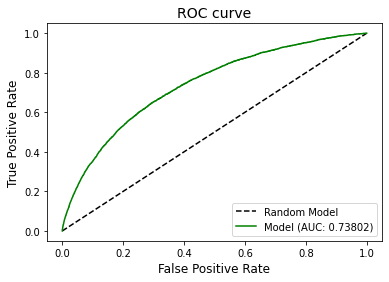

In [ ]:
# ROC sobre testing
opb.scorecard.plot_auc_roc(y_test, y_prob_test)

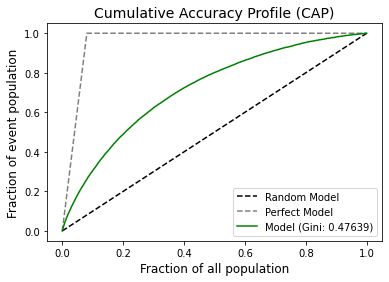

In [ ]:
# CAP sobre train
opb.scorecard.plot_cap(y_train, y_prob_train)

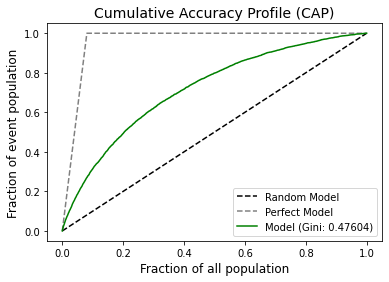

In [ ]:
# CAP sobre test
opb.scorecard.plot_cap(y_test, y_prob_test)

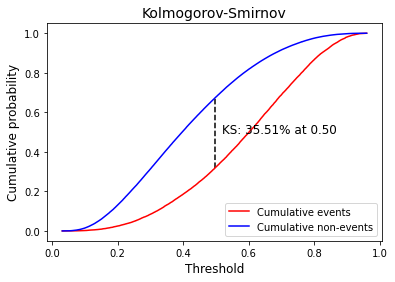

In [ ]:
# KS sobre train
opb.scorecard.plot_ks(y_train, y_prob_train)

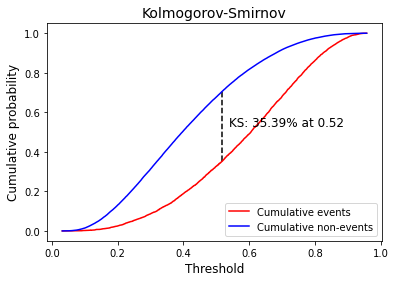

In [ ]:
# KS sobre test
opb.scorecard.plot_ks(y_test, y_prob_test)

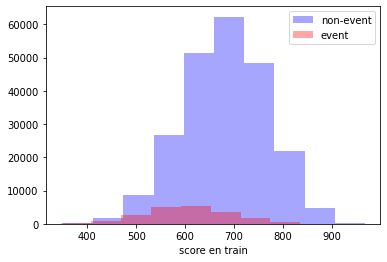

In [ ]:
# Distribución de scores para buenos y malos en train
score_train = scorecard.score(X_train)
mask = y_train == 0
plt.hist(score_train[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score_train[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en train")
plt.legend()
plt.show()

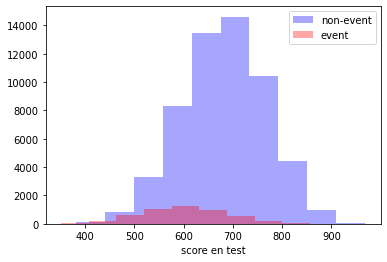

In [ ]:
# Distribución de scores para buenos y malos en test
score_test = scorecard.score(X_test)
mask = y_test == 0
plt.hist(score_test[mask], label="non-event", color="b", alpha=0.35)
plt.hist(score_test[~mask], label="event", color="r", alpha=0.35)
plt.xlabel("score en test")
plt.legend()
plt.show()

#### Matrices de confusión utilizando punto de corte probabilidad >0.5

In [ ]:
# Matriz de confusión sobre train
print(classification_report(y_train, np.where(y_prob_train>0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79    226148
           1       0.16      0.68      0.25     19860

    accuracy                           0.68    246008
   macro avg       0.56      0.68      0.52    246008
weighted avg       0.89      0.68      0.75    246008



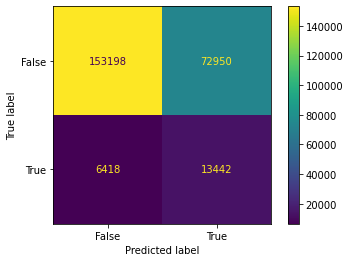

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_train
predicted = np.where(y_prob_train>0.5, 1, 0)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Matriz de confusión sobre test
print(classification_report(y_test, np.where(y_prob_test>0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     56538
           1       0.15      0.67      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.68      0.52     61503
weighted avg       0.89      0.68      0.75     61503



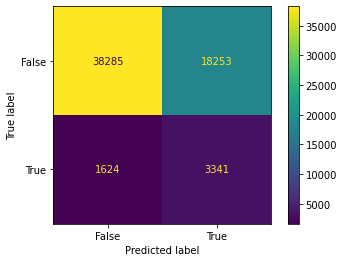

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = np.where(y_prob_test>0.5, 1, 0)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

#### Matrices de confusión utilizando el mejor punto de corte probabilidad

(0.0, 1.0)

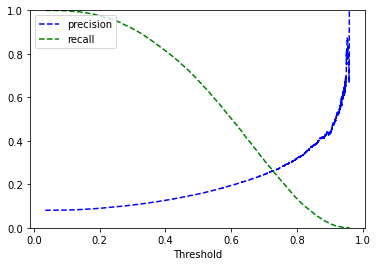

In [ ]:
# Curva precission-recall para optimizar el punto de corte
prec, rec, thre = precision_recall_curve(y_train, y_prob_train)
plt.plot(thre, prec[:-1], 'b--', label='precision')
plt.plot(thre, rec[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])

El mejor punto de corte se calculó anteriormente y está almacenado en *best_threshold*.

In [ ]:
# Matriz de confusión sobre train (con nuevo corte)
print(classification_report(y_train, np.where(y_prob_train>best_threshold, 1, 0)))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91    226148
           1       0.22      0.41      0.28     19860

    accuracy                           0.83    246008
   macro avg       0.58      0.64      0.59    246008
weighted avg       0.88      0.83      0.86    246008



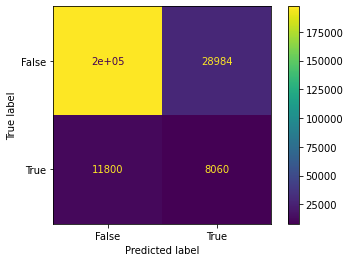

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_train
predicted = np.where(y_prob_train>best_threshold, 1, 0)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [ ]:
# Matriz de confusión sobre train (con nuevo corte)
print(classification_report(y_test, np.where(y_prob_test>best_threshold, 1, 0)))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     56538
           1       0.22      0.42      0.29      4965

    accuracy                           0.83     61503
   macro avg       0.58      0.64      0.60     61503
weighted avg       0.89      0.83      0.86     61503



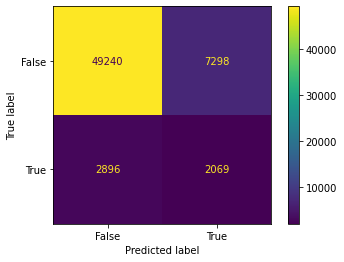

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = y_test
predicted = np.where(y_prob_test>best_threshold, 1, 0)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

### Clasificación entrenando con features relevantes

Se toma información de features numéricos relevantes desde el EDA.

In [ ]:
cat_vars = df.select_dtypes(include=['object']).columns.to_list()
relevant_features_list = relevant_features.index.tolist()

# Separar las columnas de características y la columna objetivo
X_relevant = df[relevant_features_list+cat_vars]
y_relevant = df["TARGET"]

In [ ]:
# Dividir los datos en un conjunto de entrenamiento y un conjunto de prueba
X_train_relevant, X_test_relevant, y_train_relevant, y_test_relevant = train_test_split(X_relevant, y_relevant, test_size=0.2, stratify=y)

In [ ]:
# Variables dependientes
var_x_relevant = list(set(X_relevant.columns).difference(set(['TARGET'])))
print(var_x_relevant)

['EMERGENCYSTATE_MODE', 'LIVINGAPARTMENTS_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'YEARS_BEGINEXPLUATATION_AVG', 'REGION_POPULATION_RELATIVE', 'LANDAREA_AVG', 'DAYS_LAST_PHONE_CHANGE', 'LIVINGAPARTMENTS_AVG', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16', 'FLOORSMAX_MODE', 'AMT_CREDIT', 'ENTRANCES_MEDI', 'FLOORSMIN_AVG', 'NAME_INCOME_TYPE', 'FLOORSMIN_MEDI', 'FLAG_WORK_PHONE', 'COMMONAREA_AVG', 'BASEMENTAREA_AVG', 'FLAG_OWN_CAR', 'HOUSETYPE_MODE', 'AMT_INCOME_TOTAL', 'BASEMENTAREA_MODE', 'NAME_TYPE_SUITE', 'ELEVATORS_AVG', 'TOTALAREA_MODE', 'HOUR_APPR_PROCESS_START', 'ENTRANCES_AVG', 'DAYS_REGISTRATION', 'OCCUPATION_TYPE', 'LIVINGAREA_MODE', 'FLAG_EMP_PHONE', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'REGION_RATING_CLIENT_W_CITY', 'REG_CITY_NOT_WORK_CITY', 'DEF_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE', 'EXT_SOURCE_2', 'DAYS_ID_PUBLISH', 'NONLIVINGAREA_MEDI', 'REG_CITY_NOT_LIVE_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_6', 'EXT_SOURCE_

In [ ]:
len(var_x_relevant)

86

In [ ]:
print('Se dejan de utilizar la siguiente cantidad de variables no relevantes',(len(var_x)-len(var_x_relevant)))

Se dejan de utilizar la siguiente cantidad de variables no relevantes 35


In [ ]:
# Criterio de selección en optbinnning
sel_crt = {
    "iv": {"min": 0.05, "max": 1}
}

In [ ]:
# Realizar binning a las variables categóricas
bp_relevants = opb.BinningProcess(var_x_relevant, selection_criteria=sel_crt)

In [ ]:
# Crear un diccionario para almacenar los modelos y sus puntajes F1
# Se utilizará la métrica F1 porque se espera que el modelo tenga el mejor balance posible entre presición y recall.

models_relevants = {"Regresión Logística L2": LogisticRegression(penalty= 'l2',class_weight='balanced',n_jobs=-1),
          "Perceptrón": Perceptron(penalty= 'l2', l1_ratio = 0, class_weight='balanced', n_jobs=-1)
          }
scores_relevants = {}

In [ ]:
skf = StratifiedKFold(n_splits=5)
for name, model in models_relevants.items():
  # Crear un objeto Scorecard con el modelo y el conjunto de entrenamiento
  scorecard = opb.Scorecard(binning_process=bp, estimator=model
                            ,scaling_method="min_max", scaling_method_params={"min": 300, "max": 1000})
  
  # Realizar validación cruzada estratificada y calcular el puntaje F1 promedio
  f1_scores = cross_val_score(scorecard, X_train, y_train, cv=skf, scoring="f1" ,n_jobs=-1)
  mean_f1 = f1_scores.mean()
  scores_relevants[name] = mean_f1
scores_relevants

{'Regresión Logística L2': 0.2513696880172577,
 'Perceptrón': 0.20046189242890167}

In [ ]:
# Seleccionar el modelo con el mejor puntaje F1
best_model_name_relevants = max(scores_relevants, key=scores_relevants.get)
best_model_relevants = models_relevants[best_model_name_relevants]
best_model_relevants

LogisticRegression(class_weight='balanced', n_jobs=-1)

In [ ]:
# Scorecard
scorecard_relevants = opb.Scorecard(binning_process=bp_relevants,
                             estimator=best_model_relevants, 
                             scaling_method="min_max", scaling_method_params={"min": 300, "max": 1000})

In [ ]:
# Estimación
scorecard_fit_relevants = scorecard_relevants.fit(X_train_relevant, y_train_relevant, show_digits=4)

In [ ]:
# Calcular las predicciones de probabilidad en el conjunto de prueba
y_probs_relevant = scorecard_relevants.predict_proba(X_test_relevant)[:, 1]

# Crear una lista de puntos de corte a probar
thresholds = np.arange(0.05, 1, 0.05).tolist()

# Inicializar una lista para almacenar los valores del índice F1
f1_scores_relevants = []

# Calcular el índice F1 para cada punto de corte
for threshold in thresholds:
  y_pred_relevant = (y_probs_relevant >= threshold).astype(int)
  f1_relevants = f1_score(y_test_relevant, y_pred_relevant)
  f1_scores_relevants.append(f1_relevants)

# Encontrar el punto de corte que da el mayor índice F1
best_threshold_relevants = thresholds[np.argmax(f1_scores_relevants)]
print(f"El mejor punto de corte es {best_threshold_relevants:.2f} con un índice F1 de {np.max(f1_scores_relevants):.2f}")

El mejor punto de corte es 0.65 con un índice F1 de 0.28


In [ ]:
# Predicción sobre train
y_prob_train_relevant = scorecard_relevants.predict_proba(X_train_relevant)[:, 1]

# Predicción sobre test
y_prob_test_relevant = scorecard_relevants.predict_proba(X_test_relevant)[:, 1]

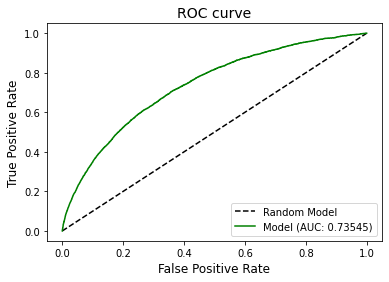

In [ ]:
# ROC sobre testing
opb.scorecard.plot_auc_roc(y_test_relevant, y_prob_test_relevant)

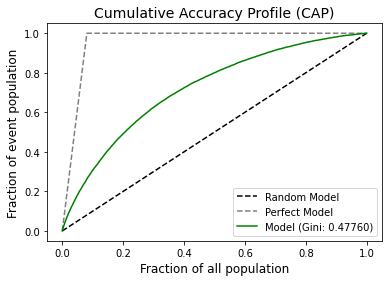

In [ ]:
# CAP sobre train
opb.scorecard.plot_cap(y_train_relevant, y_prob_train_relevant)

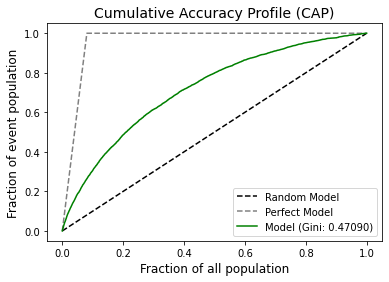

In [ ]:
# CAP sobre test
opb.scorecard.plot_cap(y_test_relevant, y_prob_test_relevant)

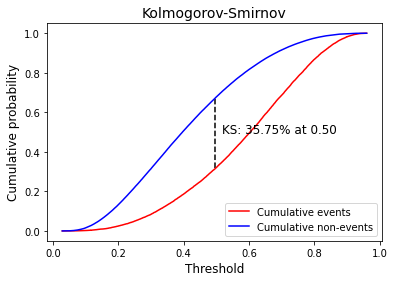

In [ ]:
# KS sobre train
opb.scorecard.plot_ks(y_train_relevant, y_prob_train_relevant)

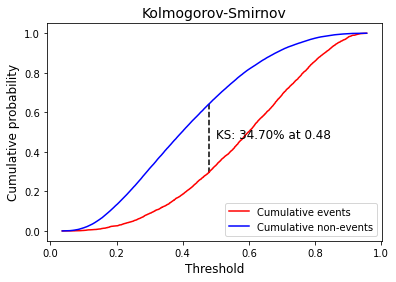

In [ ]:
# KS sobre test
opb.scorecard.plot_ks(y_test_relevant, y_prob_test_relevant)

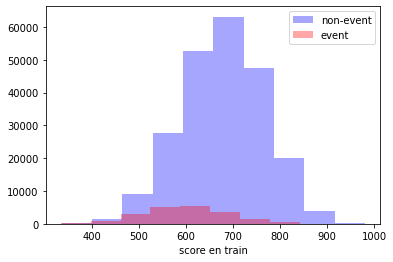

In [ ]:
# Distribución de scores para buenos y malos en train
score_train_relevant = scorecard_relevants.score(X_train_relevant)
mask_relevant = y_train_relevant == 0
plt.hist(score_train_relevant[mask_relevant], label="non-event", color="b", alpha=0.35)
plt.hist(score_train_relevant[~mask_relevant], label="event", color="r", alpha=0.35)
plt.xlabel("score en train")
plt.legend()
plt.show()

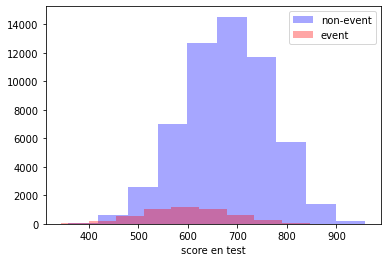

In [ ]:
# Distribución de scores para buenos y malos en test
score_test_relevant = scorecard_relevants.score(X_test_relevant)
mask_relevant = y_test_relevant == 0
plt.hist(score_test_relevant[mask_relevant], label="non-event", color="b", alpha=0.35)
plt.hist(score_test_relevant[~mask_relevant], label="event", color="r", alpha=0.35)
plt.xlabel("score en test")
plt.legend()
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.68      0.79    226148
           1       0.16      0.68      0.25     19860

    accuracy                           0.68    246008
   macro avg       0.56      0.68      0.52    246008
weighted avg       0.90      0.68      0.75    246008



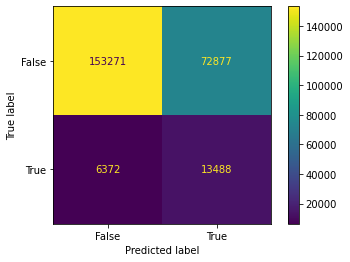

In [ ]:
# Matriz de confusión sobre train
print(classification_report(y_train_relevant, np.where(y_prob_train_relevant>0.5, 1, 0)))

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual_relevant = y_train_relevant
predicted_relevant = np.where(y_prob_train_relevant>0.5, 1, 0)

confusion_matrix_relevant = metrics.confusion_matrix(actual_relevant, predicted_relevant)

cm_display_relevant = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_relevant, display_labels = [False, True])

cm_display_relevant.plot()
plt.show()

In [ ]:
# Matriz de confusión sobre test
print(classification_report(y_test_relevant, np.where(y_prob_test_relevant>0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.96      0.68      0.79     56538
           1       0.15      0.67      0.25      4965

    accuracy                           0.67     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.67      0.75     61503



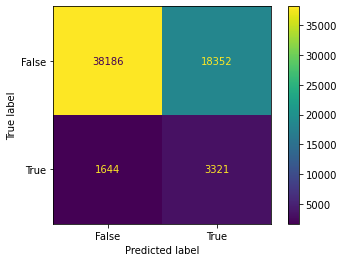

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual_relevant = y_test_relevant
predicted_relevant = np.where(y_prob_test_relevant>0.5, 1, 0)

confusion_matrix_relevant = metrics.confusion_matrix(actual_relevant, predicted_relevant)

cm_display_relevant = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_relevant, display_labels = [False, True])

cm_display_relevant.plot()
plt.show()

(0.0, 1.0)

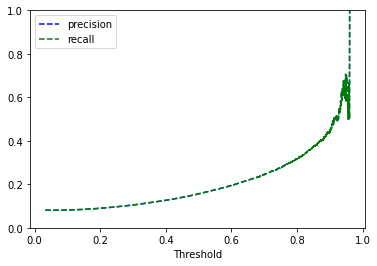

In [ ]:
# Curva precission-recall para optimizar el punto de corte
prec_relevant, rec_relevant, thre_relevant = precision_recall_curve(y_train_relevant, y_prob_train_relevant)
plt.plot(thre_relevant, prec_relevant[:-1], 'b--', label='precision')
plt.plot(thre_relevant, prec_relevant[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])


In [ ]:
# Matriz de confusión sobre train (con nuevo corte)
print(classification_report(y_train_relevant, np.where(y_prob_train_relevant>best_threshold, 1, 0)))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91    226148
           1       0.22      0.41      0.28     19860

    accuracy                           0.83    246008
   macro avg       0.58      0.64      0.60    246008
weighted avg       0.89      0.83      0.86    246008



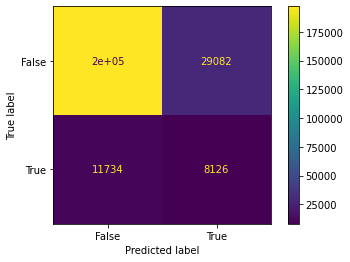

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual_relevant = y_train_relevant
predicted_relevant = np.where(y_prob_train_relevant>best_threshold, 1, 0)

confusion_matrix_relevant = metrics.confusion_matrix(actual_relevant, predicted_relevant)

cm_display_relevant = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_relevant, display_labels = [False, True])

cm_display_relevant.plot()
plt.show()


In [ ]:
# Matriz de confusión sobre train (con nuevo corte)
print(classification_report(y_test_relevant, np.where(y_prob_test_relevant>best_threshold, 1, 0)))

              precision    recall  f1-score   support

           0       0.94      0.87      0.91     56538
           1       0.22      0.41      0.28      4965

    accuracy                           0.83     61503
   macro avg       0.58      0.64      0.59     61503
weighted avg       0.88      0.83      0.86     61503



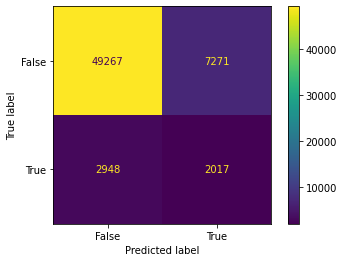

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual_relevant = y_test_relevant
predicted_relevant = np.where(y_prob_test_relevant>best_threshold, 1, 0)

confusion_matrix_relevant = metrics.confusion_matrix(actual_relevant, predicted_relevant)

cm_display_relevant = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_relevant, display_labels = [False, True])

cm_display_relevant.plot()
plt.show()

## Guardar mejor modelo

In [ ]:
# Guardado del scorecard
scorecard.save('Scorecard.pickle')

Me he quedado con el modelo que incluye todas las variables dado que obtuvo 1 punto porcentual más en su indicador de F1, movido por el recall.

He utilizado el punto de corte que obtiene mayor F1 dado que buscaría mantenr un equilibrio entre posibles casos de default y no pérdida de nuevos clientes (negocio) que sí pagarían bien.